In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathlib import Path

In [3]:
import xarray as xr

In [33]:
import os

In [5]:
from tqdm import tqdm

ROOT = Path('../final')

In [6]:
files = sorted(ROOT.glob('*/*/*/*/*temp_11_00um_2*.nc'))

In [15]:
it = iter(files)

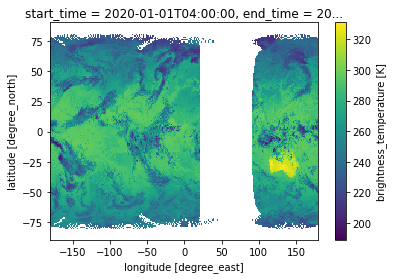

In [25]:
f = next(it)
ds = xr.open_dataset(f)

ds.temp_11_00um[0,0,::10,::10].plot.imshow()

In [32]:
ds.temp_11_00um[0,0,::10,::10].sel(latitude=slice(10,-10)).isnull().any().item()

True

In [34]:
os.environ['XRIT_DECOMPRESS_PATH'] = '/data/cphillips/isccp-ng/isccp_l1g_prototype/xrit/PublicDecompWT/xRITDecompress/xRITDecompress'

In [35]:
import satpy

In [38]:
from glob import glob

In [60]:
files = glob('../l1b/2020/202001/20200101/20200101T0400/m8/temp_11_00um/*')

In [62]:
pdb

Automatic pdb calling has been turned ON


In [63]:
scene = satpy.Scene(files)

No filenames found for reader: iasi_l2
No filenames found for reader: viirs_compact
No filenames found for reader: virr_l1b
No filenames found for reader: mersi2_l1b
No filenames found for reader: clavrx
No filenames found for reader: viirs_edr_active_fires
No filenames found for reader: goes-imager_hrit
No filenames found for reader: seviri_l1b_native
No filenames found for reader: ami_l1b
No filenames found for reader: fci_l2_nc
No filenames found for reader: ghrsst_l3c_sst
No filenames found for reader: olci_l2
No filenames found for reader: modis_l2
No filenames found for reader: scatsat1_l2b
No filenames found for reader: smos_l2_wind
No filenames found for reader: omps_edr
No filenames found for reader: glm_l2
No filenames found for reader: vaisala_gld360
No filenames found for reader: slstr_l2
No filenames found for reader: nwcsaf-msg2013-hdf5
No filenames found for reader: acspo
No filenames found for reader: maia
No filenames found for reader: vii_l2_nc
No filenames found for 

TypeError: only size-1 arrays can be converted to Python scalars

> /data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/satpy/readers/eum_base.py(35)timecds2datetime()
     33     Works both with a dictionary and a numpy record_array.
     34     """
---> 35     days = int(tcds['Days'])
     36     milliseconds = int(tcds['Milliseconds'])
     37     try:



ipdb>  up


> /data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/satpy/readers/eum_base.py(67)recarray2dict()
     65                                      for item in data.ravel()]).reshape(data.shape)
     66             else:
---> 67                 res[key] = timecds2datetime(data)
     68         elif isinstance(ntype, list):
     69             res[key] = recarray2dict(data)



ipdb>  


> /data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/satpy/readers/eum_base.py(69)recarray2dict()
     67                 res[key] = timecds2datetime(data)
     68         elif isinstance(ntype, list):
---> 69             res[key] = recarray2dict(data)
     70         else:
     71             if data.size == 1:



ipdb>  


> /data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/satpy/readers/eum_base.py(69)recarray2dict()
     67                 res[key] = timecds2datetime(data)
     68         elif isinstance(ntype, list):
---> 69             res[key] = recarray2dict(data)
     70         else:
     71             if data.size == 1:



ipdb>  


> /data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/satpy/readers/seviri_l1b_hrit.py(413)read_epilogue()
    411             fp_.seek(self.mda['total_header_length'])
    412             data = np.fromfile(fp_, dtype=hrit_epilogue, count=1)
--> 413             self.epilogue.update(recarray2dict(data))
    414 
    415     def reduce(self, max_size):



ipdb>  type(hrit_epilogue)


<class 'numpy.dtype[void]'>


ipdb>  hrit_epilogue.itemsize


380325


ipdb>  self.mda['total_header_length']


90


ipdb>  exit


In [59]:
scene.readers

{'seviri_l1b_hrit': <satpy.readers.yaml_reader.GEOSegmentYAMLReader at 0x7f2a984405b0>}

In [54]:
pdb

Automatic pdb calling has been turned OFF


In [44]:
scene.available_dataset_names()

['IR_108']

In [45]:
scene.load(['IR_108'])

/data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string =

In [47]:
ir = scene['IR_108'].load()

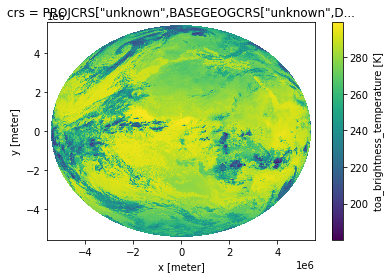

In [49]:
ir.plot.imshow()